# Mountain Car Task

<span style="font-family: monospace; font-size:18px;">

In this Jupyter notebook, we delve into Example 10.1 from Barto's book on reinforcement learning, which presents the Mountain Car Task.
In this problem, we are tasked with driving a car that lacks power up a steep mountain path.
To effectively address this challenge, we utilize tile coding for state representation and apply the semi-gradient SARSA algorithm to guide the car's ascent.
This setup provides a practical illustration of applying reinforcement learning techniques to solve problems with specific environmental constraints.


</span>

## Import libraries

In [1]:
from mountain_car_class import MountainCar
from tile_coder import TileCoder
from semi_gradient_sarsa_agent import SemiGradientSarsaAgent

from utils import get_optimal_value_function_and_policy, plot_state_value_function, steps_per_episode, plot_steps_per_episode

## Create environment

In [2]:
env = MountainCar()
tile_coder = TileCoder()

## Run simulation

In [3]:
%%time

sarsa_agent = SemiGradientSarsaAgent(env, tile_coder)

state_action_function, history = sarsa_agent.run_simulation(50000)

CPU times: user 32min 49s, sys: 2.45 s, total: 32min 51s
Wall time: 32min 52s


## Optimal State Values 

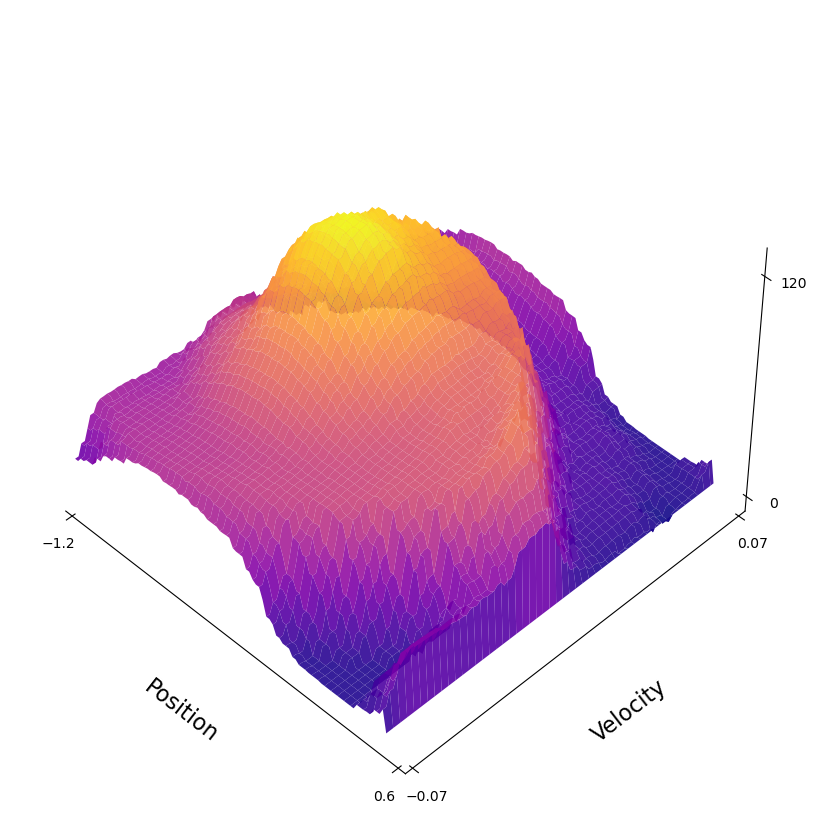

In [4]:
state_value_function, _ = get_optimal_value_function_and_policy(env, state_action_function)
plot_state_value_function(state_value_function)

## Steps per episode

In [5]:
sarsa_agent_1 = SemiGradientSarsaAgent(env, tile_coder, alpha=0.1/8)
sarsa_agent_2 = SemiGradientSarsaAgent(env, tile_coder, alpha=0.2/8)
sarsa_agent_3 = SemiGradientSarsaAgent(env, tile_coder, alpha=0.5/8)

steps_per_episode_1 = steps_per_episode(sarsa_agent_1, iterations=100, n_episodes=500)
steps_per_episode_2 = steps_per_episode(sarsa_agent_2, iterations=100, n_episodes=500)
steps_per_episode_3 = steps_per_episode(sarsa_agent_3, iterations=100, n_episodes=500)


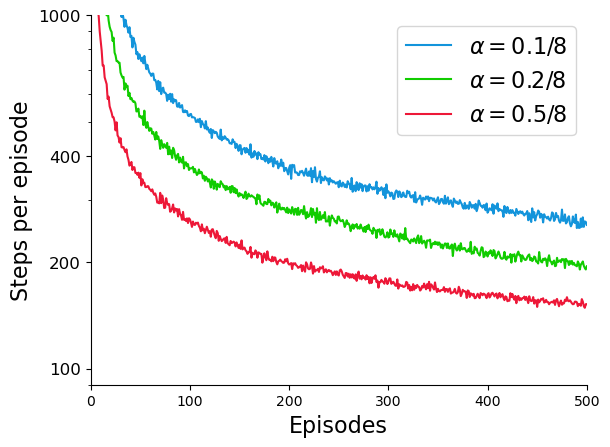

In [6]:
results = [{"data": {"x": steps_per_episode_1["episode"], "y": steps_per_episode_1["avg_timesteps"]},
           "param": {"label": r"$ \alpha = 0.1/8$", "color": "#1394DB"}},
           {"data": {"x": steps_per_episode_2["episode"], "y": steps_per_episode_2["avg_timesteps"]},
            "param": {"label": r"$ \alpha = 0.2/8$", "color": "#11CC00"}},
           {"data": {"x": steps_per_episode_3["episode"], "y": steps_per_episode_3["avg_timesteps"]},
            "param": {"label": r"$ \alpha = 0.5/8$", "color": "#ED1838"}}]

plot_steps_per_episode(results)